### RFM 분석 실습

- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- invoiceNo: 거래 번호
- StockCode: 상품 코드
- Description: 상품명
- InvoiceDate: 거래 날짜
- UnitPrice: 상품 단가
- CustomerID: 고객 번호
- Country: 국가명

In [1]:
import pandas as pd
import numpy as np
path = './datasets/customer_invoice_data.csv'


# parse_dates 날짜형식으로 되어있는 데이터를 datetime형식으로 바꿔주는 함수
ci_df = pd.read_csv(path)
display(ci_df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [2]:
ci_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
ci_df['CustomerID'] = ci_df['CustomerID'].fillna(0).astype(int)
ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [4]:
ci_df.duplicated().sum()

5268

In [5]:
ci_df.drop_duplicates(inplace=True)

In [6]:
ci_df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [7]:
# 결측치를 데이터 탐색을 통해 선정된 대표값으로 채우기
ci_df[['CustomerID']].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,536641.0,11435.904653,6795.04425,0.0,0.0,14336.0,16241.0,18287.0


In [8]:
#중위 소득
median_customer = ci_df['CustomerID'].median()

ci_df["CustomerID"].fillna(median_customer, inplace=True)
ci_df.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [9]:
ci_df["Description"].fillna("Unknown", inplace=True)
ci_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
ci_df.sort_values(by='InvoiceDate', ascending=False

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
332572,566079,22924,FRIDGE MAGNETS LA VIE EN ROSE,24,9/9/2011 9:52,0.85,17593,United Kingdom
332545,566079,23425,STORAGE TIN HOME SWEET HOME,6,9/9/2011 9:52,2.49,17593,United Kingdom
332552,566079,22398,MAGNETS PACK OF 4 SWALLOWS,48,9/9/2011 9:52,0.39,17593,United Kingdom
332551,566079,22396,MAGNETS PACK OF 4 RETRO PHOTO,24,9/9/2011 9:52,0.39,17593,United Kingdom
332550,566079,22400,MAGNETS PACK OF 4 HOME SWEET HOME,24,9/9/2011 9:52,0.39,17593,United Kingdom
...,...,...,...,...,...,...,...,...
50831,540561,22743,MAKE YOUR OWN FLOWERPOWER CARD KIT,6,1/10/2011 10:32,2.95,13004,United Kingdom
50809,540561,22343,PARTY PIZZA DISH RED RETROSPOT,24,1/10/2011 10:32,0.21,13004,United Kingdom
50808,540560,21589,Unknown,-14,1/10/2011 10:08,0.00,0,United Kingdom
50807,C540559,21888,BINGO SET,-4,1/10/2011 10:07,3.75,0,EIRE


In [11]:
# datetype 타입으로 변경
ci_df['InvoiceDate'] = pd.to_datetime(ci_df['InvoiceDate'])

# 날짜 형식 변경
ci_df['InvoiceDate'] = ci_df['InvoiceDate'].dt.strftime('%Y-%m-%d')
ci_df['Year_Date'] = pd.to_datetime(ci_df['InvoiceDate']).apply(lambda x: (pd.to_datetime('2011-12-09') - x).days)

display(ci_df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year_Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,373
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France,0


In [12]:
import numpy as np

Q1 = ci_df.describe().T.loc['UnitPrice', '25%']
Q3 = ci_df.describe().T.loc['UnitPrice', '75%']

iqr = Q3 - Q1

lower_bound = Q1 - iqr * 1.5
upper_bound = Q3 + iqr * 1.5

if lower_bound < 0:
    lower_bound = 0


print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

정상치 범위: 0 ~ 8.45


In [13]:
# UnitPrice가 0보다 작은 것을 뻈습니다.
ci_df = ci_df[ci_df['UnitPrice'] >= 0]
ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year_Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,373
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France,0


In [14]:
ci_df = ci_df[ci_df['CustomerID'] != 0]
ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year_Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,373
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France,0


In [15]:
ci_df = ci_df[ci_df['Quantity'] >= 0]
ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year_Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,373
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France,0


In [16]:
ci_df['CustomerID'].value_counts()

CustomerID
17841    7676
14911    5672
14096    5111
12748    4413
14606    2677
         ... 
17747       1
16737       1
18184       1
15313       1
13106       1
Name: count, Length: 4339, dtype: int64

In [17]:
# CustomerID를 기준으로 그룹화하여 Quantity를 합산합니다.
ci_df_grouped = ci_df.groupby('CustomerID').agg({'Quantity': 'sum'}).reset_index()
ci_df_grouped

,CustomerID,Quantity
0,12346,74215
1,12347,2458
2,12348,2341
3,12349,631
4,12350,197
...,...,...
4334,18280,45
4335,18281,54
4336,18282,103
4337,18283,1357


### 데이터 전처리

In [18]:
ci_df['CustomerID'].value_counts()

CustomerID
17841    7676
14911    5672
14096    5111
12748    4413
14606    2677
         ... 
17747       1
16737       1
18184       1
15313       1
13106       1
Name: count, Length: 4339, dtype: int64

In [19]:
# ci_df = ci_df.groupby('CustomerID')['CustomerID'].transform('count')
# display(ci_df)

In [20]:
# rfm_r = ci_df.groupby('CustomerID')['CustomerID'].min().reset_index()
# rfm_r.columns = ['CustomerID', 'Recency']

# rfm_r

In [21]:
rfm_r = ci_df.groupby('CustomerID')['Year_Date'].min().reset_index()
rfm_r.columns = ['CustomerID', 'Recency']

# Frequency
rfm_f = ci_df['CustomerID'].value_counts().reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']

# Monetary
rfm_m = ci_df.groupby('CustomerID')['UnitPrice'].sum().reset_index()
rfm_m.columns = ['CustomerID', 'Monetary']

rfm = pd.merge(rfm_r, rfm_f, on='CustomerID')
rfm = pd.merge(rfm, rfm_m, on='CustomerID')

rfm

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,1.04
1,12347,2,182,481.21
2,12348,75,31,178.71
3,12349,18,73,605.10
4,12350,310,17,65.30
...,...,...,...,...
4334,18280,277,10,47.65
4335,18281,180,7,39.36
4336,18282,7,12,62.39
4337,18283,3,721,1174.33


In [22]:
ci_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392732 non-null  object 
 1   StockCode    392732 non-null  object 
 2   Description  392732 non-null  object 
 3   Quantity     392732 non-null  int64  
 4   InvoiceDate  392732 non-null  object 
 5   UnitPrice    392732 non-null  float64
 6   CustomerID   392732 non-null  int64  
 7   Country      392732 non-null  object 
 8   Year_Date    392732 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 30.0+ MB


In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rfm[['Recency', 'Frequency', 'Monetary']] = \
                                    scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [24]:
# 최근일 수록 숫자가 더 작게 나오기 때문에, 1을 빼준 값으로 점수를 계산한다.
rfm['Recency'] = 1 - rfm['Recency']
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346,0.128686,0.000000,0.000031
1,12347,0.994638,0.023583,0.014437
2,12348,0.798928,0.003909,0.005361
3,12349,0.951743,0.009381,0.018153
4,12350,0.168901,0.002085,0.001959
...,...,...,...,...
4334,18280,0.257373,0.001173,0.001430
4335,18281,0.517426,0.000782,0.001181
4336,18282,0.981233,0.001433,0.001872
4337,18283,0.991957,0.093811,0.035231


In [25]:
# RFM 점수 계산
rfm['TotalScore'] = rfm[['Recency', 'Frequency', 'Monetary']].sum(axis=1)
rfm

,CustomerID,Recency,Frequency,Monetary,TotalScore
0,12346,0.128686,0.000000,0.000031,0.128718
1,12347,0.994638,0.023583,0.014437,1.032658
2,12348,0.798928,0.003909,0.005361,0.808198
3,12349,0.951743,0.009381,0.018153,0.979277
4,12350,0.168901,0.002085,0.001959,0.172945
...,...,...,...,...,...
4334,18280,0.257373,0.001173,0.001430,0.259975
4335,18281,0.517426,0.000782,0.001181,0.519389
4336,18282,0.981233,0.001433,0.001872,0.984538
4337,18283,0.991957,0.093811,0.035231,1.120999


In [26]:
drop_columns = [
   'StockCode', 'Description'
]

ci_df = ci_df.drop(labels=drop_columns, axis=1)
ci_df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year_Date
0,536365,6,2010-12-01,2.55,17850,United Kingdom,373
1,536365,6,2010-12-01,3.39,17850,United Kingdom,373
2,536365,8,2010-12-01,2.75,17850,United Kingdom,373
3,536365,6,2010-12-01,3.39,17850,United Kingdom,373
4,536365,6,2010-12-01,3.39,17850,United Kingdom,373
...,...,...,...,...,...,...,...
541904,581587,12,2011-12-09,0.85,12680,France,0
541905,581587,6,2011-12-09,2.10,12680,France,0
541906,581587,4,2011-12-09,4.15,12680,France,0
541907,581587,4,2011-12-09,4.15,12680,France,0


In [27]:
ci_rfm_df = pd.merge(ci_df, rfm, on='CustomerID')
display(ci_rfm_df)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year_Date,Recency,Frequency,Monetary,TotalScore
0,536365,6,2010-12-01,2.55,17850,United Kingdom,373,0.002681,0.038567,0.035288,0.076536
1,536365,6,2010-12-01,3.39,17850,United Kingdom,373,0.002681,0.038567,0.035288,0.076536
2,536365,8,2010-12-01,2.75,17850,United Kingdom,373,0.002681,0.038567,0.035288,0.076536
3,536365,6,2010-12-01,3.39,17850,United Kingdom,373,0.002681,0.038567,0.035288,0.076536
4,536365,6,2010-12-01,3.39,17850,United Kingdom,373,0.002681,0.038567,0.035288,0.076536
...,...,...,...,...,...,...,...,...,...,...,...
392727,581578,12,2011-12-09,1.25,12713,Germany,0,1.000000,0.004821,0.002854,1.007675
392728,581578,12,2011-12-09,0.85,12713,Germany,0,1.000000,0.004821,0.002854,1.007675
392729,581578,12,2011-12-09,0.85,12713,Germany,0,1.000000,0.004821,0.002854,1.007675
392730,581578,12,2011-12-09,2.08,12713,Germany,0,1.000000,0.004821,0.002854,1.007675


In [28]:
import numpy as np

l1, l2, l3, l4 = np.percentile(ci_rfm_df['TotalScore'], [23, 55, 73, 88])
print(l1, l2, l3, l4)

0.8973466084231484 1.013599752416214 1.0622743241155952 1.182108278640908


In [29]:
def get_level(x):
    if x <= l1:
        return 5
    if x > l1 and x <= l2:
        return 4
    if x > l2 and x <= l3:
        return 3
    if x > l3 and x <= l4:
        return 2
    return 1

In [30]:
ci_rfm_df['Level'] = ci_rfm_df['TotalScore'].apply(get_level)
ci_rfm_df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year_Date,Recency,Frequency,Monetary,TotalScore,Level
0,536365,6,2010-12-01,2.55,17850,United Kingdom,373,0.002681,0.038567,0.035288,0.076536,5
1,536365,6,2010-12-01,3.39,17850,United Kingdom,373,0.002681,0.038567,0.035288,0.076536,5
2,536365,8,2010-12-01,2.75,17850,United Kingdom,373,0.002681,0.038567,0.035288,0.076536,5
3,536365,6,2010-12-01,3.39,17850,United Kingdom,373,0.002681,0.038567,0.035288,0.076536,5
4,536365,6,2010-12-01,3.39,17850,United Kingdom,373,0.002681,0.038567,0.035288,0.076536,5
...,...,...,...,...,...,...,...,...,...,...,...,...
392727,581578,12,2011-12-09,1.25,12713,Germany,0,1.000000,0.004821,0.002854,1.007675,4
392728,581578,12,2011-12-09,0.85,12713,Germany,0,1.000000,0.004821,0.002854,1.007675,4
392729,581578,12,2011-12-09,0.85,12713,Germany,0,1.000000,0.004821,0.002854,1.007675,4
392730,581578,12,2011-12-09,2.08,12713,Germany,0,1.000000,0.004821,0.002854,1.007675,4


In [31]:
ci_rfm_df['Level'] = ci_rfm_df['Level'].replace([5, 4, 3, 2, 1], ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])
ci_rfm_df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year_Date,Recency,Frequency,Monetary,TotalScore,Level
0,536365,6,2010-12-01,2.55,17850,United Kingdom,373,0.002681,0.038567,0.035288,0.076536,Bronze
1,536365,6,2010-12-01,3.39,17850,United Kingdom,373,0.002681,0.038567,0.035288,0.076536,Bronze
2,536365,8,2010-12-01,2.75,17850,United Kingdom,373,0.002681,0.038567,0.035288,0.076536,Bronze
3,536365,6,2010-12-01,3.39,17850,United Kingdom,373,0.002681,0.038567,0.035288,0.076536,Bronze
4,536365,6,2010-12-01,3.39,17850,United Kingdom,373,0.002681,0.038567,0.035288,0.076536,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
392727,581578,12,2011-12-09,1.25,12713,Germany,0,1.000000,0.004821,0.002854,1.007675,Silver
392728,581578,12,2011-12-09,0.85,12713,Germany,0,1.000000,0.004821,0.002854,1.007675,Silver
392729,581578,12,2011-12-09,0.85,12713,Germany,0,1.000000,0.004821,0.002854,1.007675,Silver
392730,581578,12,2011-12-09,2.08,12713,Germany,0,1.000000,0.004821,0.002854,1.007675,Silver


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

print(ci_rfm_df['Level'].value_counts())

Level
Silver     126011
Bronze      90332
Gold        70479
Diamond     59594
VIP         46316
Name: count, dtype: int64


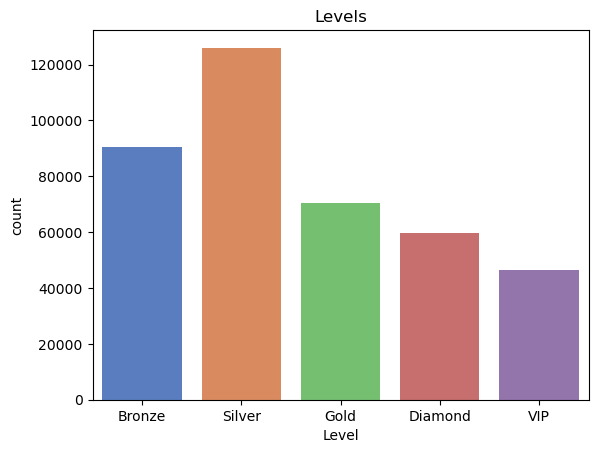

In [33]:
sns.countplot(x='Level', data=ci_rfm_df, palette='muted', order=order)
plt.title('Levels')
plt.show()

<Axes: xlabel='Level', ylabel='Year_Date'>

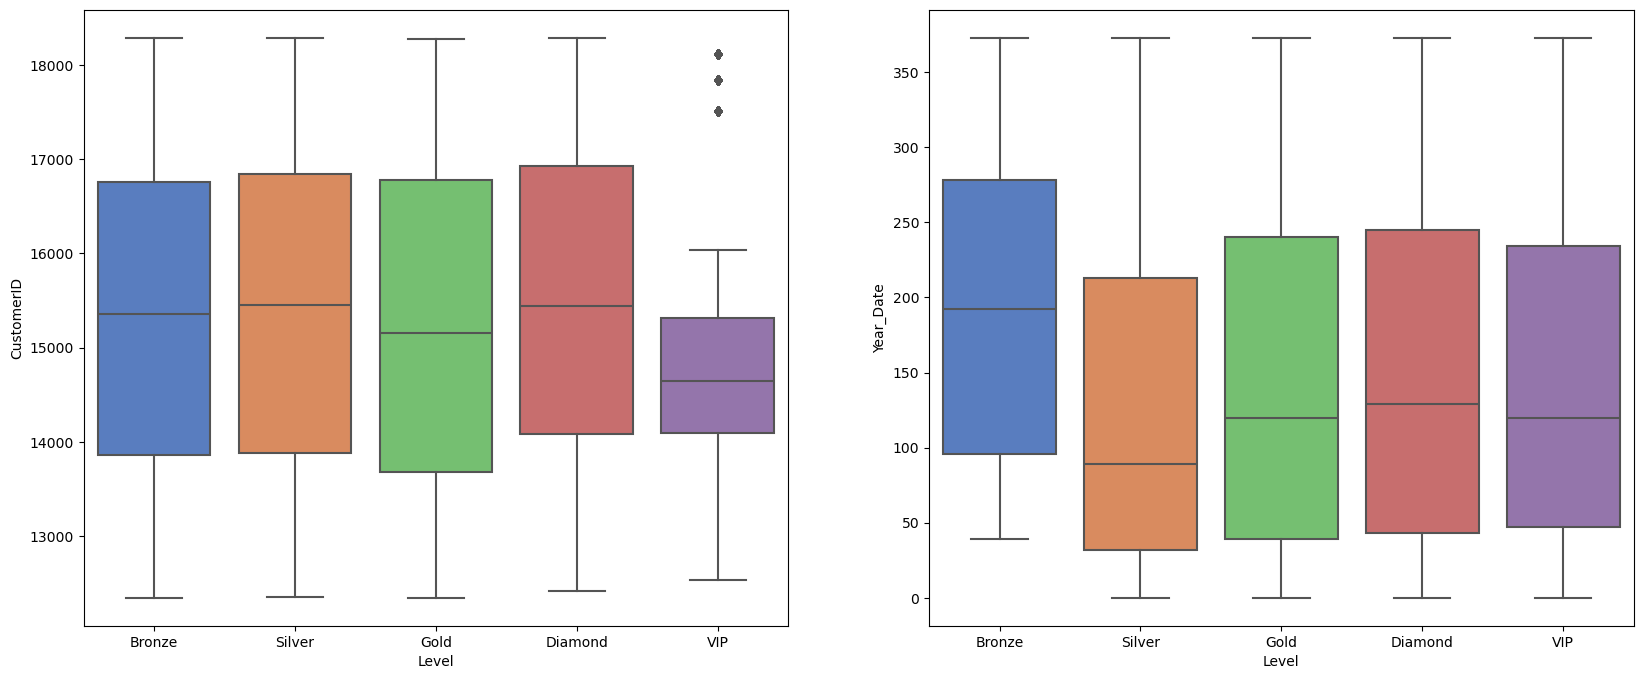

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

# 어떤 고객 ID가 어떤 레벨인지 알고 싶었습니다.
sns.boxplot(ax=axes[0], x='Level', y='CustomerID', data=ci_rfm_df, palette='muted', order=order_columns)

# 레벨마다 결제 금액은 어느정도 일지 궁금하다
sns.boxplot(ax=axes[1], x='Level', y='Year_Date', data=ci_rfm_df, palette='muted', order=order_columns)

In [36]:
ci_rfm_df['Country'].value_counts()

Country
United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


In [51]:
top_countries = ['Netherlands','United Kingdom', 'Germany', 'France','Netherlands']
ci_rfm_df.loc[~ci_rfm_df['Country'].isin(top_countries), 'Country'] = 'Others'

In [38]:
ci_rfm_df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year_Date,Recency,Frequency,Monetary,TotalScore,Level
0,536365,6,2010-12-01,2.55,17850,United Kingdom,373,0.002681,0.038567,0.035288,0.076536,Bronze
1,536365,6,2010-12-01,3.39,17850,United Kingdom,373,0.002681,0.038567,0.035288,0.076536,Bronze
2,536365,8,2010-12-01,2.75,17850,United Kingdom,373,0.002681,0.038567,0.035288,0.076536,Bronze
3,536365,6,2010-12-01,3.39,17850,United Kingdom,373,0.002681,0.038567,0.035288,0.076536,Bronze
4,536365,6,2010-12-01,3.39,17850,United Kingdom,373,0.002681,0.038567,0.035288,0.076536,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
392727,581578,12,2011-12-09,1.25,12713,Germany,0,1.000000,0.004821,0.002854,1.007675,Silver
392728,581578,12,2011-12-09,0.85,12713,Germany,0,1.000000,0.004821,0.002854,1.007675,Silver
392729,581578,12,2011-12-09,0.85,12713,Germany,0,1.000000,0.004821,0.002854,1.007675,Silver
392730,581578,12,2011-12-09,2.08,12713,Germany,0,1.000000,0.004821,0.002854,1.007675,Silver


<Axes: xlabel='Country', ylabel='count'>

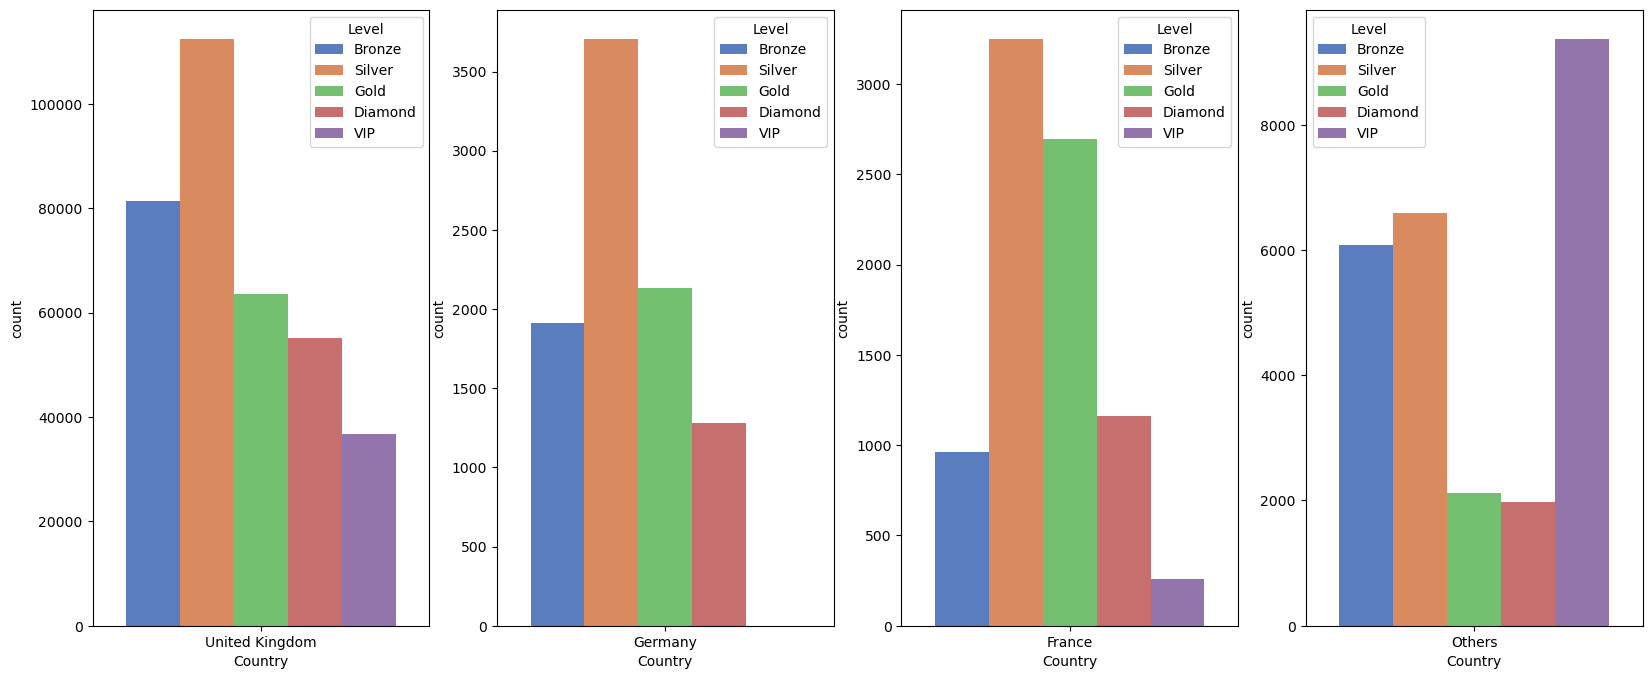

In [48]:
fig, axes = plt.subplots(1, 4, figsize=(20, 8))

order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

sns.countplot(ax=axes[0], x='Country', hue='Level', data=ci_rfm_df[ci_rfm_df['Country'] == 'United Kingdom'], palette='muted', hue_order=order_columns)
sns.countplot(ax=axes[1], x='Country', hue='Level', data=ci_rfm_df[ci_rfm_df['Country'] == 'Germany'], palette='muted', hue_order=order_columns)
sns.countplot(ax=axes[2], x='Country', hue='Level', data=ci_rfm_df[ci_rfm_df['Country'] == 'France'], palette='muted', hue_order=order_columns)
sns.countplot(ax=axes[3], x='Country', hue='Level', data=ci_rfm_df[ci_rfm_df['Country'] == 'Others'], palette='muted', hue_order=order_columns)

#### 보고서 형식
- 나라별 분포도가 있는데 가장 United Kindom이 가장 큰 분포도로 나타내어 있다.
- 대부분 United Kingdom이 크게 나타내어 있어 모든 등급의 고객들에게 보다 관련성있는 캠페인 또는 마케팅을 제공하여 보다 높은 수익을 얻을 수 있으며  
  모든 나라보다 매출이 높은것으로 보아 각 등급의 고객들의 만족도를 높이는 것이 낫다.
- Others 빼고 세나라는 Silver 등급이 높으며 가격이나 서비스를 홍보하는 것이 효과적일 수 있으며 
- Germany는 sliver gold 등급이 높아 고객들에게 보다 관련성있는 마케팅을 제공할 수 있다.
- Francce는 Silver 등급과 Gold 등급의 고객이 많으며 프로모션과 이벤트를 통해 고객들의 만족도를 높일 수가 있습니다.
- Others 나라는 VIP등급이 높은것으로 보아 해당 나라에서 마케팅 활동을 펼쳐 모든 고객들의 만족도를 높이고 매출을 증대시킬 수 있을것으로 기대됩니다.
- Germany는 VIP 등급이 없어서 고개들이 수요가 많이 없다는 것을 알 수 있습니다.